### Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer

from sklearn.datasets import fetch_california_housing



In [6]:
dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target

In [9]:
df = pd.DataFrame(X_full, columns=dataset.feature_names)

# EDA

In [18]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [10]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
df.drop(['Latitude','Longitude'], axis=1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 6 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
dtypes: float64(6)
memory usage: 967.6 KB


In [14]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333


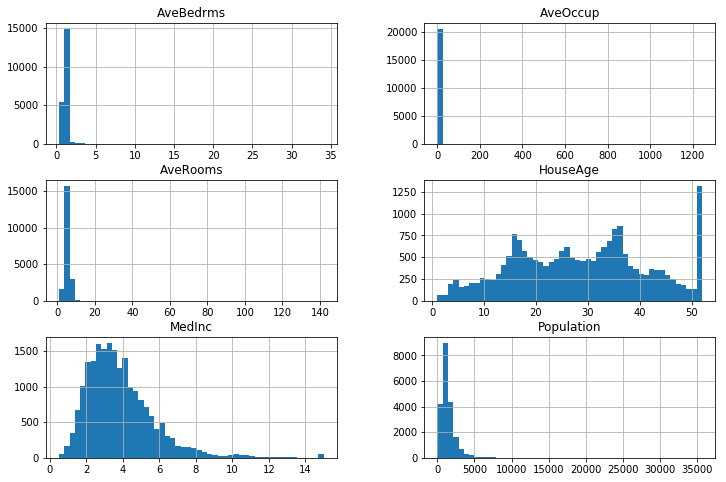

In [21]:
df.hist(bins=50, figsize=(12,8));

In [41]:
df.sort_values('AveOccup',ascending = False).head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286
16669,4.2639,46.0,9.076923,1.307692,6532.0,502.461538
13034,6.1359,52.0,8.275862,1.517241,6675.0,230.172414
9172,4.2391,5.0,5.123810,0.933333,8733.0,83.171429
12104,1.6250,8.0,7.600000,0.950000,1275.0,63.750000
16420,5.7485,26.0,5.366667,0.900000,1542.0,51.400000
8874,9.3370,52.0,7.285714,1.214286,1154.0,41.214286
13366,4.2578,36.0,5.258824,1.117647,2886.0,33.952941
5986,1.8750,52.0,4.500000,1.206349,2688.0,21.333333


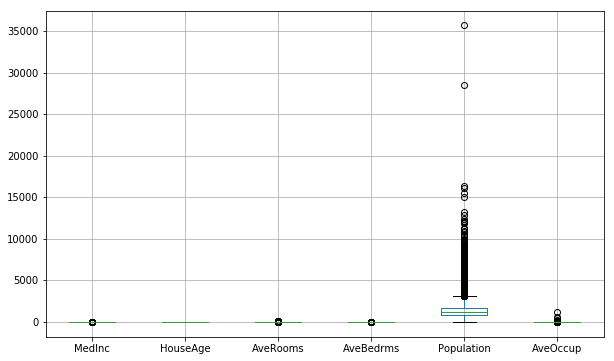

In [54]:
#shows how different the scales are for each feature
df.boxplot(figsize=(10,6));

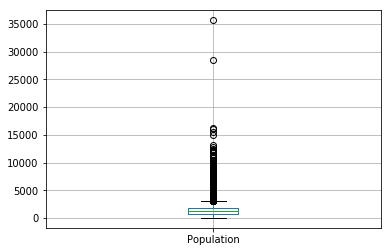

In [84]:
df[['Population']].boxplot();

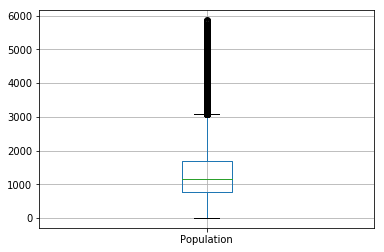

In [86]:
df[['Population']].drop(list(df.sort_values('Population',ascending = False).head(200).index)).boxplot();

# Original Data

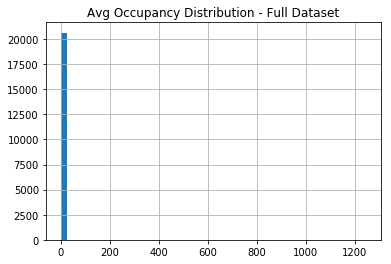

In [46]:
#total dataset
df['AveOccup'].hist(bins=50)
plt.title('Avg Occupancy Distribution - Full Dataset');

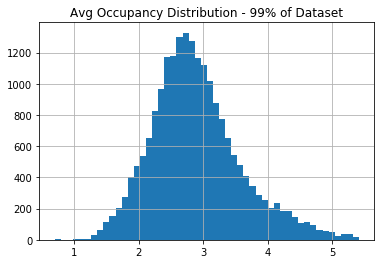

In [47]:
#removing highest 1% to zoom in
df['AveOccup'].drop(list(df.sort_values('AveOccup',ascending = False).head(200).index)).hist(bins=50)
plt.title('Avg Occupancy Distribution - 99% of Dataset');

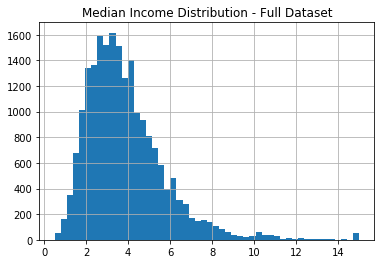

In [48]:
#total dataset
df['MedInc'].hist(bins=50)
plt.title('Median Income Distribution - Full Dataset');

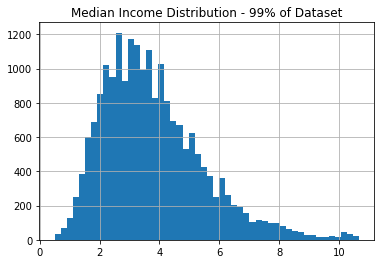

In [49]:
#removing highest 1% to zoom in
df['MedInc'].drop(list(df.sort_values('MedInc',ascending = False).head(200).index)).hist(bins=50)
plt.title('Median Income Distribution - 99% of Dataset');

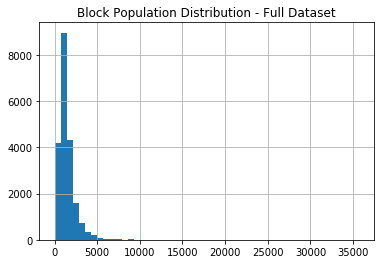

In [62]:
#total dataset
df['Population'].hist(bins=50)
plt.title('Block Population Distribution - Full Dataset');

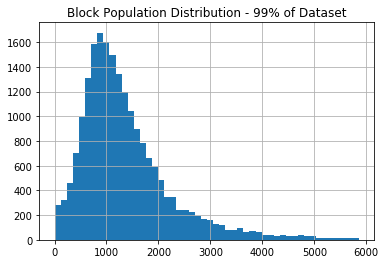

In [63]:
#removing highest 1% to zoom in
df['Population'].drop(list(df.sort_values('Population',ascending = False).head(200).index)).hist(bins=50)
plt.title('Block Population Distribution - 99% of Dataset');

# Log Transformations

In [64]:
df['log_pop'] = df['Population'].apply(lambda x: np.log(x))

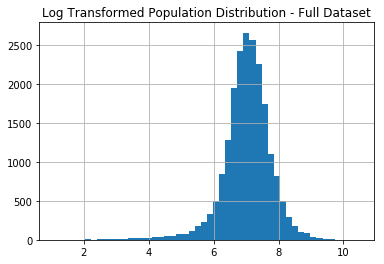

In [66]:
#total dataset
df['log_pop'].hist(bins=50)
plt.title('Log Transformed Population Distribution - Full Dataset');

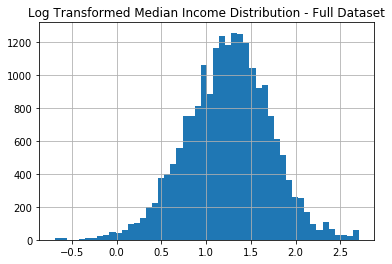

In [67]:
df['log_MedInc'] = df['MedInc'].apply(lambda x: np.log(x))
#total dataset
df['log_MedInc'].hist(bins=50)
plt.title('Log Transformed Median Income Distribution - Full Dataset');

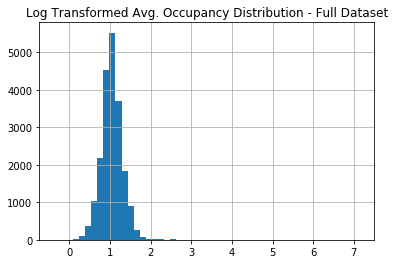

In [68]:
df['log_AveOcc'] = df['AveOccup'].apply(lambda x: np.log(x))
#total dataset
df['log_AveOcc'].hist(bins=50)
plt.title('Log Transformed Avg. Occupancy Distribution - Full Dataset');

In [73]:
np.log(.5)

-0.6931471805599453

# Min-Max Scaler

In [78]:
MMS_trans = pd.DataFrame(MinMaxScaler().fit_transform(df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']]), columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup'])

In [80]:
MMS_trans.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198


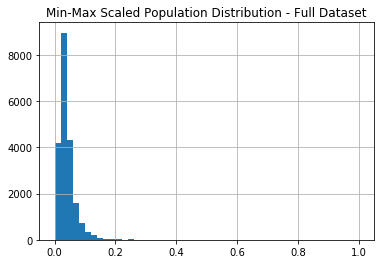

In [81]:
MMS_trans['Population'].hist(bins=50)
plt.title('Min-Max Scaled Population Distribution - Full Dataset');

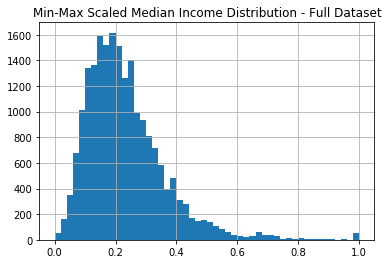

In [82]:
MMS_trans['MedInc'].hist(bins=50)
plt.title('Min-Max Scaled Median Income Distribution - Full Dataset');

# Max Absolute Scaler

In [87]:
MAS_trans = pd.DataFrame(MaxAbsScaler().fit_transform(df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']]), columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup'])


In [89]:
MAS_trans.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,0.555010,0.788462,0.049216,0.030053,0.009024,0.002055
1,0.553423,0.403846,0.043959,0.028529,0.067289,0.001697
2,0.483823,1.000000,0.058405,0.031510,0.013901,0.002254
3,0.376204,1.000000,0.040994,0.031499,0.015638,0.002049
4,0.256412,1.000000,0.044267,0.031734,0.015834,0.001755


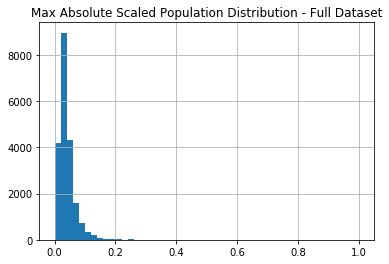

In [91]:
MAS_trans['Population'].hist(bins=50)
plt.title('Max Absolute Scaled Population Distribution - Full Dataset');

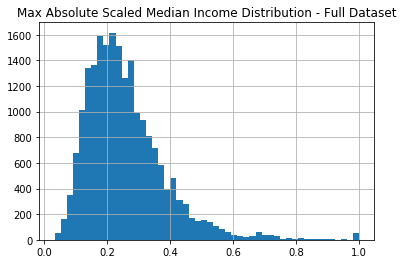

In [92]:
MAS_trans['MedInc'].hist(bins=50)
plt.title('Max Absolute Scaled Median Income Distribution - Full Dataset');

# Standard Scaler

In [93]:
SS_trans = pd.DataFrame(StandardScaler().fit_transform(df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']]), columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup'])


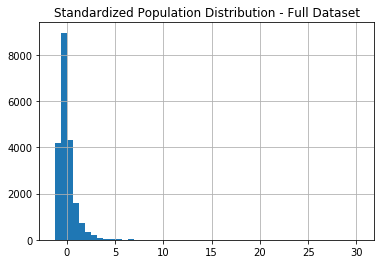

In [94]:
SS_trans['Population'].hist(bins=50)
plt.title('Standardized Population Distribution - Full Dataset');

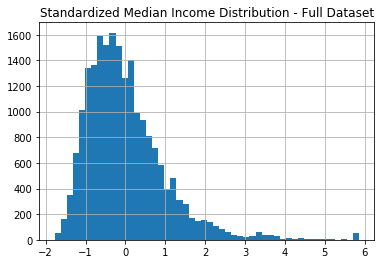

In [95]:
SS_trans['MedInc'].hist(bins=50)
plt.title('Standardized Median Income Distribution - Full Dataset');

# Robust Scaler

In [96]:
RS_trans = pd.DataFrame(RobustScaler().fit_transform(df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']]), columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup'])


In [97]:
RS_trans.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,2.197582,0.631579,1.088935,-0.267221,-0.899787,-0.307981
1,2.186664,-0.421053,0.626066,-0.822926,1.316631,-0.830800
2,1.707732,1.210526,1.898042,0.263955,-0.714286,-0.018599
3,0.967177,1.210526,0.364978,0.259814,-0.648188,-0.316908
4,0.142854,1.210526,0.653191,0.345657,-0.640725,-0.746784


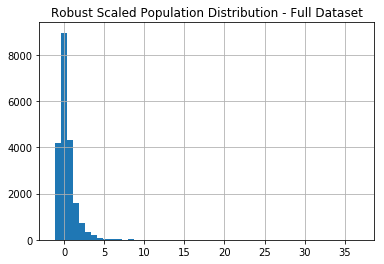

In [98]:
RS_trans['Population'].hist(bins=50)
plt.title('Robust Scaled Population Distribution - Full Dataset');

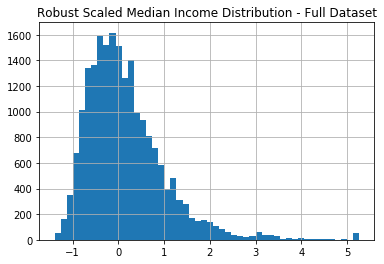

In [99]:
RS_trans['MedInc'].hist(bins=50)
plt.title('Robust Scaled Median Income Distribution - Full Dataset');

# Power Transformer

## Yeo-Johnson

In [100]:
YJ_trans = pd.DataFrame(PowerTransformer(method='yeo-johnson').fit_transform(df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']]), columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup'])

In [101]:
YJ_trans.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,1.903289,0.975968,1.106394,-0.296934,-1.619967,-0.368763
1,1.897081,-0.568893,0.712367,-0.847336,1.090355,-1.186265
2,1.604361,1.761010,1.673645,0.162493,-1.139853,0.005053
3,1.051321,1.761010,0.461045,0.159137,-1.000270,-0.381080
4,0.205878,1.761010,0.737176,0.228006,-0.985268,-1.040230


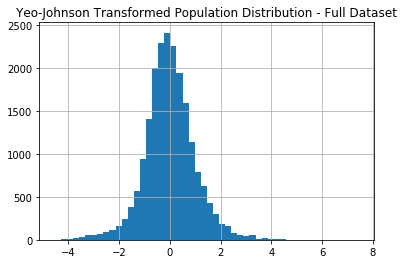

In [102]:
YJ_trans['Population'].hist(bins=50)
plt.title('Yeo-Johnson Transformed Population Distribution - Full Dataset');

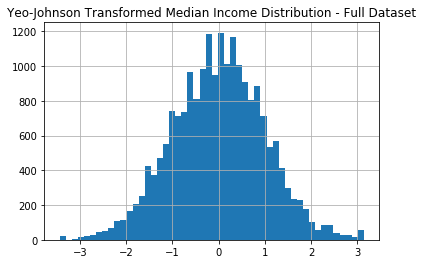

In [103]:
YJ_trans['MedInc'].hist(bins=50)
plt.title('Yeo-Johnson Transformed Median Income Distribution - Full Dataset');

## Box-Cox

In [104]:
BC_trans = pd.DataFrame(PowerTransformer(method='box-cox').fit_transform(df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']]), columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup'])

In [105]:
BC_trans.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,1.916290,0.975223,1.089474,-0.289009,-1.618362,-0.353862
1,1.909694,-0.566735,0.700008,-0.797407,1.090062,-1.172198
2,1.601978,1.757447,1.655264,0.137412,-1.139047,0.013813
3,1.035967,1.757447,0.452580,0.134288,-0.999677,-0.366032
4,0.198026,1.757447,0.724468,0.198463,-0.984697,-1.024226


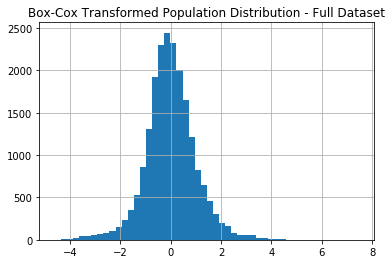

In [106]:
BC_trans['Population'].hist(bins=50)
plt.title('Box-Cox Transformed Population Distribution - Full Dataset');

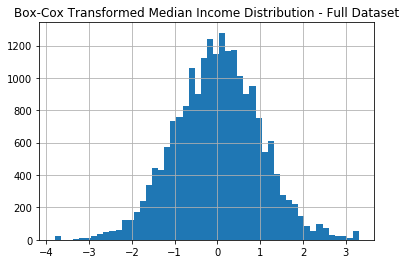

In [107]:
BC_trans['MedInc'].hist(bins=50)
plt.title('Box-Cox Transformed Median Income Distribution - Full Dataset');